# Data Gathering

We learnt different methods of gathering data like Webscarping, Manual Data gathering (Github clone) and REST API call. 
REST API method is most used in industry.It is the most stable and professional way of gathering data. 
Here I use Manual gathering method from github by John Hopkins.

# John Hopkins GITHUB Covid-19 data

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib
import numpy as np

%matplotlib inline
from datetime import datetime 
pd.set_option('display.max_rows',500)

In [2]:
datapath ='/home/tk_conda/Documents/Shoriya/DataScience/datascience-covid19/data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw = pd.read_csv(datapath)

In [3]:
pd_raw

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,95,95,95,95,95,95,95,95,95,95
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,461882,471806,478792,488007,500034,512293,524198,535705,546481,555537
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,44461,44649,44783,44845,44953,45152,45326,45503,45675,45862
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,113,113,113,113,113,113,113,113,113,113
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,4104,4114,4118,4126,4135,4142,4152,4157,4166,4170


In [4]:
time_idx=pd_raw.columns[4:]
dataframe_time_idx = pd.DataFrame({'date':time_idx})
dataframe_time_idx.head()
pd=pd_raw.head()
pd

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20,9/10/20,9/11/20,9/12/20,9/13/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38304,38324,38398,38494,38520,38544,38572,38606,38641,38716
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9967,10102,10255,10406,10553,10704,10860,11021,11185,11353
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,45773,46071,46364,46653,46938,47216,47488,47752,48007,48254
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1215,1215,1215,1261,1261,1301,1301,1344,1344,1344
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2876,2935,2965,2981,3033,3092,3217,3279,3335,3388


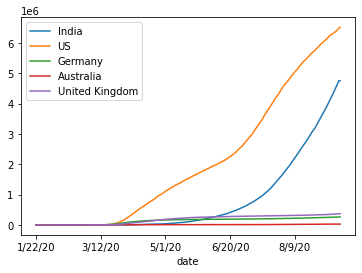

In [5]:
pd_raw.iloc[:,4::].sum(axis=0)
country_list = ['India','US','Germany','Australia','United Kingdom']
for each in country_list:
    dataframe_time_idx[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4:].sum(axis=0))
dataframe_time_idx
dataframe_time_idx.set_index('date').plot()

# REST API call

In [6]:
import requests
from bs4 import BeautifulSoup
import json

In [7]:
data=requests.get('https://services7.arcgis.com/mOBPykOjAyBO2ZKk/arcgis/rest/services/RKI_COVID19/FeatureServer/0/query?where=1%3D1&outFields=*&outSR=4326&f=json')
data.content

b'{"objectIdFieldName":"ObjectId","uniqueIdField":{"name":"ObjectId","isSystemMaintained":true},"globalIdFieldName":"","fields":[{"name":"IdBundesland","type":"esriFieldTypeInteger","alias":"IdBundesland","sqlType":"sqlTypeInteger","domain":null,"defaultValue":null},{"name":"Bundesland","type":"esriFieldTypeString","alias":"Bundesland","sqlType":"sqlTypeNVarchar","length":2147483647,"domain":null,"defaultValue":null},{"name":"Landkreis","type":"esriFieldTypeString","alias":"Landkreis","sqlType":"sqlTypeNVarchar","length":2147483647,"domain":null,"defaultValue":null},{"name":"Altersgruppe","type":"esriFieldTypeString","alias":"Altersgruppe","sqlType":"sqlTypeNVarchar","length":2147483647,"domain":null,"defaultValue":null},{"name":"Geschlecht","type":"esriFieldTypeString","alias":"Geschlecht","sqlType":"sqlTypeNVarchar","length":2147483647,"domain":null,"defaultValue":null},{"name":"AnzahlFall","type":"esriFieldTypeInteger","alias":"AnzahlFall","sqlType":"sqlTypeInteger","domain":null,"d

In [8]:
json_object= json.loads(data.content)

In [9]:
type(json_object)

dict

In [10]:
json_object.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'fields', 'exceededTransferLimit', 'features'])

In [11]:
json_object

{'objectIdFieldName': 'ObjectId',
 'uniqueIdField': {'name': 'ObjectId', 'isSystemMaintained': True},
 'globalIdFieldName': '',
 'fields': [{'name': 'IdBundesland',
   'type': 'esriFieldTypeInteger',
   'alias': 'IdBundesland',
   'sqlType': 'sqlTypeInteger',
   'domain': None,
   'defaultValue': None},
  {'name': 'Bundesland',
   'type': 'esriFieldTypeString',
   'alias': 'Bundesland',
   'sqlType': 'sqlTypeNVarchar',
   'length': 2147483647,
   'domain': None,
   'defaultValue': None},
  {'name': 'Landkreis',
   'type': 'esriFieldTypeString',
   'alias': 'Landkreis',
   'sqlType': 'sqlTypeNVarchar',
   'length': 2147483647,
   'domain': None,
   'defaultValue': None},
  {'name': 'Altersgruppe',
   'type': 'esriFieldTypeString',
   'alias': 'Altersgruppe',
   'sqlType': 'sqlTypeNVarchar',
   'length': 2147483647,
   'domain': None,
   'defaultValue': None},
  {'name': 'Geschlecht',
   'type': 'esriFieldTypeString',
   'alias': 'Geschlecht',
   'sqlType': 'sqlTypeNVarchar',
   'length'

In [12]:
full_list=[]
for pos,each_dict in enumerate (json_object['features'][:]):
    full_list.append(each_dict['attributes'])


In [13]:
DataFrame(full_list)

,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,ObjectId,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,1,Schleswig-Holstein,SK Flensburg,A00-A04,W,1,0,35509445,1598227200000,01001,"14.09.2020, 00:00 Uhr",0,-9,1598227200000,0,1,0,Nicht übermittelt
1,1,Schleswig-Holstein,SK Flensburg,A05-A14,W,1,0,35509446,1597449600000,01001,"14.09.2020, 00:00 Uhr",0,-9,1597449600000,0,1,0,Nicht übermittelt
2,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,35509447,1584144000000,01001,"14.09.2020, 00:00 Uhr",0,-9,1584316800000,0,1,1,Nicht übermittelt
3,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,35509448,1584576000000,01001,"14.09.2020, 00:00 Uhr",0,-9,1584057600000,0,1,1,Nicht übermittelt
4,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,35509449,1584576000000,01001,"14.09.2020, 00:00 Uhr",0,-9,1584316800000,0,1,1,Nicht übermittelt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,2,Hamburg,SK Hamburg,A15-A34,W,1,0,35514442,1585526400000,02000,"14.09.2020, 00:00 Uhr",0,-9,1584835200000,0,1,1,Nicht übermittelt
4996,2,Hamburg,SK Hamburg,A15-A34,W,1,0,35514443,1585526400000,02000,"14.09.2020, 00:00 Uhr",0,-9,1584921600000,0,1,1,Nicht übermittelt
4997,2,Hamburg,SK Hamburg,A15-A34,W,1,0,35514444,1585526400000,02000,"14.09.2020, 00:00 Uhr",0,-9,1585440000000,0,1,1,Nicht übermittelt
4998,2,Hamburg,SK Hamburg,A15-A34,W,3,0,35514445,1585526400000,02000,"14.09.2020, 00:00 Uhr",0,-9,1585526400000,0,3,0,Nicht übermittelt
